In [259]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')
%matplotlib inline

# Finding patterns in the data
In this notebook we will try to extract words that have nice time series.

In [260]:
wordYear = pd.read_csv('Data/3kPluswordPerYear.csv',index_col=0)
print('Shape : ',wordYear.shape)
wordYear.head()

Shape :  (197, 43051)


,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarg,aarhus,...,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre,——,———,„„„
1798-01-01,0.0,0.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0
1799-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
1804-01-01,0.0,0.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,2.0,0.0,18.0,5.0,0.0,0.0
1805-01-01,0.0,4.0,9.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,4.0
1806-01-01,3.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0


We also have to keep the data until 1997, because for 1998 we only have too months.

In [261]:
wordYear = wordYear.loc[wordYear.index[:-1]]
wordYear.shape

(196, 43051)

First we will keep only time series that have sufficient datapoints to create smooth functions from which to choose interesting ones. If we analyze sparse time series, we will get results that are not consistent  with what we are looking for.

In [262]:
numOccurences = wordYear.astype(bool).sum(axis=0).values

In [354]:
fullYear = wordYear[wordYear.columns[numOccurences>40]]
index = fullYear.index
fullYear.shape

(196, 12883)

We also have to be working in normalized data so that we can identify increase in usage.

In [355]:
fullYearNorm = fullYear.divide(fullYear.sum(axis=1).values,axis=0)

And we will also smooth the data.

In [356]:
fullYear.head()

,aarau,abaisser,abandon,abandonner,abattoir,abattre,abattue,abbaye,abbott,abbé,...,êlre,êtes-vous,être,île,ôter,ôtre,œcuménique,œil,œuf,œuvre
1798-01-01,0.0,0.0,7.0,42.0,0.0,4.0,0.0,40.0,0.0,12.0,...,0.0,0.0,1928.0,10.0,10.0,0.0,0.0,10.0,0.0,4.0
1799-01-01,0.0,0.0,3.0,130.0,0.0,4.0,7.0,43.0,0.0,4.0,...,0.0,0.0,2292.0,138.0,4.0,0.0,0.0,16.0,0.0,6.0
1804-01-01,0.0,0.0,4.0,40.0,0.0,0.0,0.0,22.0,0.0,16.0,...,0.0,0.0,1756.0,108.0,3.0,0.0,0.0,15.0,2.0,18.0
1805-01-01,0.0,0.0,6.0,60.0,0.0,0.0,0.0,66.0,0.0,42.0,...,0.0,0.0,1995.0,149.0,3.0,0.0,0.0,6.0,0.0,16.0
1806-01-01,0.0,0.0,0.0,38.0,0.0,0.0,0.0,36.0,0.0,7.0,...,0.0,0.0,2131.0,176.0,0.0,0.0,0.0,37.0,0.0,26.0


In [357]:
fullYear = fullYear.rolling(window=3).mean()

### Finding increasing time series
To find a time serie that increases over time we will compte the gradient of each function and pick the words for which the gradient is maximum.

In [358]:
totGrad = fullYear.apply(np.gradient).sum()
Grad = fullYear.apply(np.gradient)

In [359]:
wordsIncrease = totGrad.sort_values(ascending=False).index[10:20]

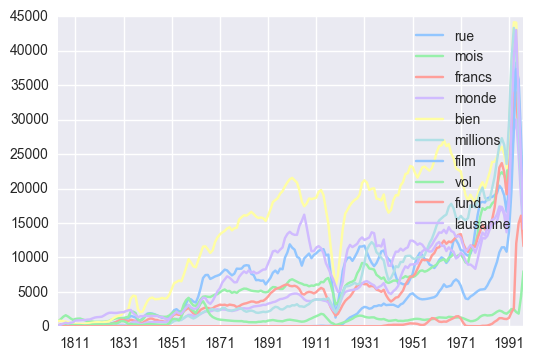

In [360]:
for i in wordsIncrease:
    plt.plot_date(index,fullYear[i].values,'-',label=i)
plt.legend()

Let's look at words where the time serie is always increasing.

In [361]:
columnName = fullYear.columns.values
GradPos = Grad[Grad>0]
allPos = GradPos.fillna(0).astype(bool).sum(axis=0).sort_values(ascending=False).index[:10]
allPos

Index(['selon', 'permettre', 'face', 'lors', 'début', 'deuxième', 'peu',
       'notamment', 'réussir', 'monde'],
      dtype='object')

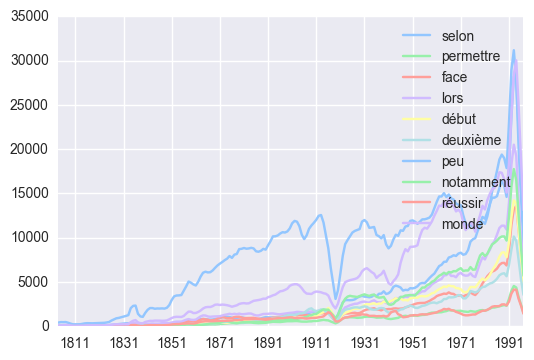

In [362]:
for i in allPos:
    plt.plot_date(index,fullYear[i].values,'-',label=i)
plt.legend()

### Finding decreasing time series
For this we will do the same thing but the other way round.

In [363]:
wordsDecrease = totGrad.sort_values().index[20:30]

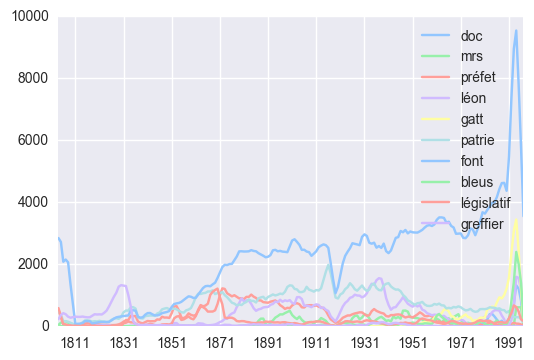

In [364]:
for i in wordsDecrease:
    plt.plot_date(index,fullYear[i].values,'-',label=i)
plt.legend()

In [365]:
GradNeg = Grad[Grad<0]
AllPosNeg = GradNeg.fillna(0).astype(bool).sum(axis=0).sort_values(ascending=False).index[:10]
AllPosNeg

Index(['pay', 'ports', 'perfection', 'allier', 'empereur', 'arm', 'turquie',
       'impératrice', 'russie', 'attach'],
      dtype='object')

### Finding words that stay constant

We want to find words whoe usage stay sort of constant over time.

In [376]:
gradConst = Grad[Grad>-2][Grad <2].fillna(0).astype(bool).sum(axis=0).sort_values(ascending=False)

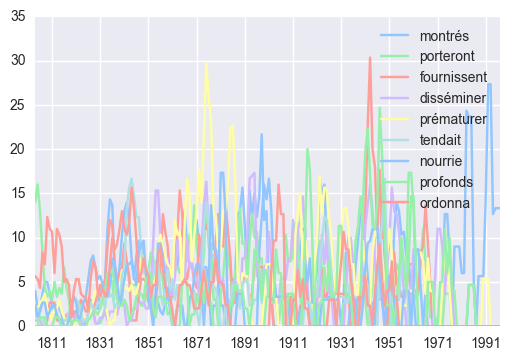

In [377]:
for i in gradConst.index[1:10]:
    plt.plot_date(index,fullYear[i].values,'-',label=i)
plt.legend()

We were not able to find stable time series exept for the ones that had a lot of zeros.

### Finding correlated time series

In [267]:
fullYear.fillna(0,inplace=True)
fullYearNorm = fullYear.divide(fullYear.sum(axis=1),axis=0)

In [7]:
covMatrix = fullYearNorm.cov()

In [8]:
wordOfInterest = (covMatrix > 0.2).sum(axis=1)

In [9]:
fullYear.index[wordOfInterest > 2]

/Users/thomas/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py:1434: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 196 but corresponding boolean dimension is 12850
  result = getitem(key)


Index([], dtype='object')

In [10]:
covMatrix.head()

,aarau,abaisser,abandon,abandonnant,abandonnent,abandonner,abattoir,abattre,abattue,abba,...,êlre,êtes-vous,être,île,ôter,ôtre,œcuménique,œil,œuf,œuvre
aarau,5.192284e-10,7.310474e-11,1.077068e-10,-4.182900e-11,-1.375873e-11,-6.878638e-11,1.788317e-11,-2.528398e-11,-3.814508e-11,-3.602977e-12,...,-6.412416e-11,-2.250294e-12,-5.218365e-09,-1.537610e-09,-5.288785e-11,-3.564007e-12,-2.714771e-11,3.437741e-10,4.370533e-11,4.644252e-09
abaisser,7.310474e-11,1.537203e-10,4.453689e-11,-6.860294e-12,-3.899827e-13,4.333640e-11,-4.339794e-13,-1.034198e-11,-1.892331e-10,-6.371098e-12,...,9.883137e-11,2.479836e-12,-7.431629e-10,-4.010957e-10,-6.726735e-13,1.064528e-11,-3.210705e-11,1.358026e-10,1.665421e-11,1.669313e-10
abandon,1.077068e-10,4.453689e-11,3.908574e-10,-4.057188e-11,-6.954577e-12,-2.607166e-10,-6.006763e-12,-1.805521e-12,1.442721e-11,1.530351e-11,...,-9.069164e-11,4.427339e-12,-7.528868e-09,-1.867894e-09,-3.677372e-11,-1.561942e-11,2.380046e-10,3.285888e-10,9.308486e-11,4.680692e-09
abandonnant,-4.182900e-11,-6.860294e-12,-4.057188e-11,3.520410e-11,3.285488e-12,1.413890e-10,-3.052732e-12,8.476735e-12,2.172562e-11,-4.675925e-12,...,3.404295e-11,-1.828506e-13,1.474375e-09,3.170502e-10,7.996610e-12,-2.413712e-12,-3.598215e-11,-9.087266e-11,-2.220671e-11,-1.213215e-09
abandonnent,-1.375873e-11,-3.899827e-13,-6.954577e-12,3.285488e-12,7.001636e-12,8.906464e-12,-7.044853e-13,2.023281e-12,-3.917590e-12,-3.082239e-13,...,2.356213e-12,1.700844e-13,3.726100e-10,3.021270e-11,7.093194e-12,-6.629343e-13,-7.461751e-12,-2.363129e-11,-3.871066e-12,-2.425668e-10


In [11]:
np.corrcoef(fullYearNorm.aarau,fullYear.aarau)

array([[ 1.        ,  0.79999865],
       [ 0.79999865,  1.        ]])

In [268]:
PearsonCorr = fullYear.corr()
PearsonCorr.head()

,aarau,abaisser,abandon,abandonner,abattoir,abattre,abattue,abbaye,abbott,abbé,...,êlre,êtes-vous,être,île,ôter,ôtre,œcuménique,œil,œuf,œuvre
aarau,1.000000,0.325695,0.330360,-0.057786,0.231367,-0.148576,0.008435,-0.504901,-0.073871,0.265373,...,-0.080608,-0.090809,-0.248817,-0.366863,-0.423776,-0.021674,-0.050462,0.398454,0.176012,0.523493
abaisser,0.325695,1.000000,0.281745,0.105743,0.037601,-0.076995,-0.229368,-0.231533,-0.070142,0.020080,...,0.214975,0.145397,-0.025579,-0.199182,-0.038738,0.199559,-0.110909,0.307873,0.113353,0.035870
abandon,0.330360,0.281745,1.000000,-0.301468,-0.129130,-0.064024,0.034641,-0.550323,0.591581,-0.316944,...,-0.092091,0.051577,-0.397230,-0.468952,-0.315530,-0.112238,0.576141,0.405042,0.429727,0.610037
abandonner,-0.057786,0.105743,-0.301468,1.000000,0.125634,0.509345,0.049613,0.415378,-0.549335,0.339760,...,0.413867,0.390674,0.591811,0.342528,0.409436,0.138772,-0.589056,0.049341,-0.340442,-0.393869
abattoir,0.231367,0.037601,-0.129130,0.125634,1.000000,0.080594,0.111453,-0.149325,-0.158212,0.326301,...,0.078870,0.127249,-0.066232,-0.028294,-0.041310,0.253439,-0.251742,0.364751,0.020033,0.082768


In [278]:
highPear = fullYear.columns[(PearsonCorr > 0.9).sum(axis=1)>10]

In [279]:
highPear

Index(['abbott', 'aboutir', 'abram', 'accent', 'accord', 'accorder', 'accords',
       'accoutumer', 'accroiss', 'accroître',
       ...
       'évaluation', 'éveiller', 'éventuel', 'éventuelle', 'évidence',
       'évoluer', 'évolution', 'êlre', 'œcuménique', 'œuvre'],
      dtype='object', length=1646)

In [341]:
wordInGroup = 'aubergiste'
otherWords = PearsonCorr.columns[PearsonCorr.loc[wordInGroup] > 0.85]

In [342]:
otherWords

Index(['agissante', 'allaman', 'aubergiste', 'avis', 'consistant',
       'consternation', 'contenance', 'contenant', 'district', 'domicilier',
       'exposeront', 'galetas', 'grandvaux', 'guex', 'juge', 'masse', 'pinter',
       'prescrite', 'pressoire', 'présumer', 'remontrance', 'renseignemens',
       'régens', 'sentimen', 'sieur', 'situer', 'soumissions', 'soussigner',
       'suivan', 'syndic', 'vase', 'établissemen'],
      dtype='object')

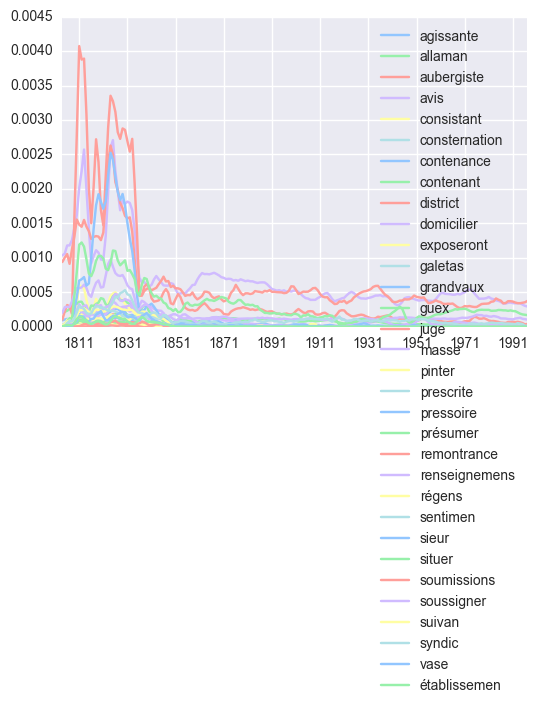

In [343]:
for i in otherWords:
    plt.plot_date(index,fullYearNorm[i].values,'-',
            label=i)

plt.legend()

### All the most present words


In [28]:
maxWords = fullYearNorm.sum(axis=0).sort_values(ascending=False).index[0:15]

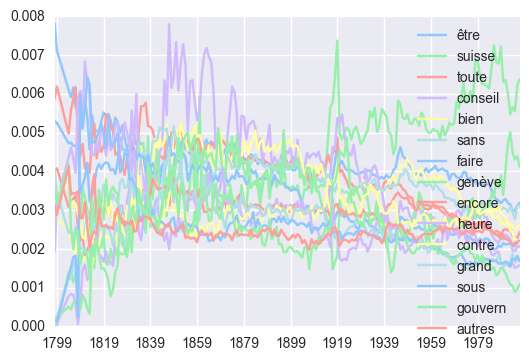

In [29]:
for maximum in maxWords:
    plt.plot_date(index,fullYearNorm[maximum].values,'-',label=maximum)

plt.legend()

### Dendogram Clustering

In [30]:
import scipy.cluster.hierarchy as hac

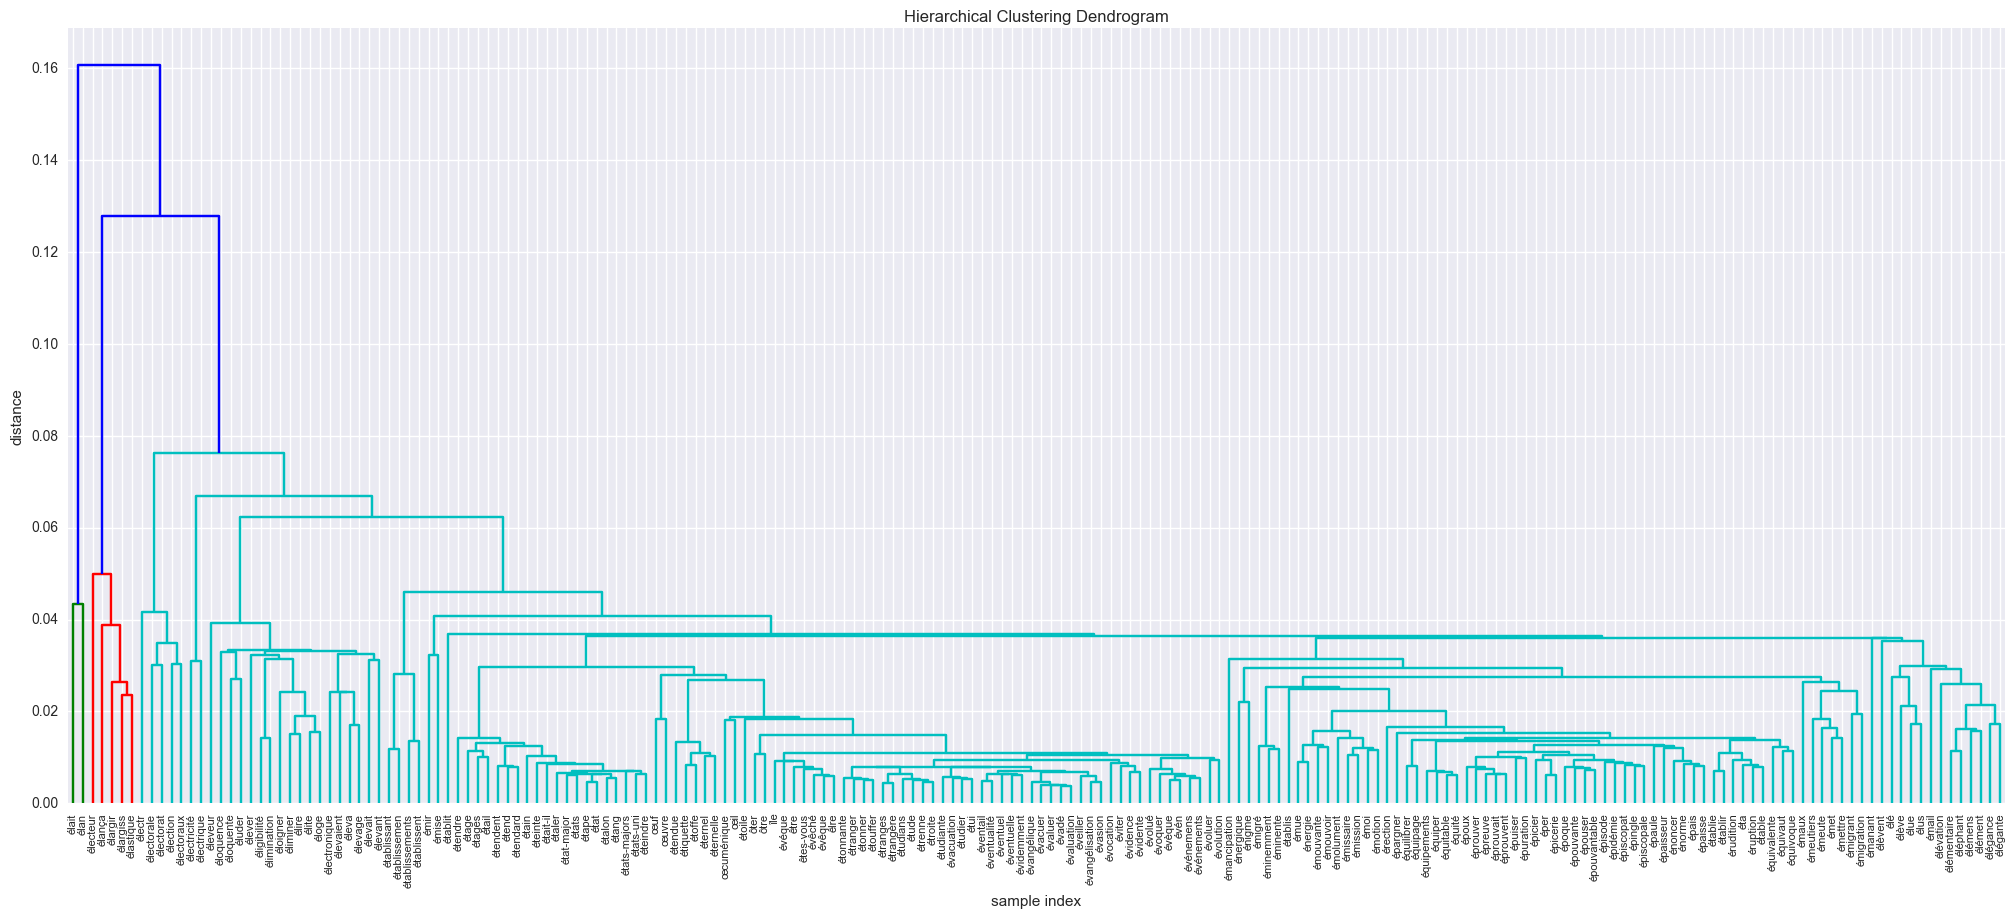

In [36]:
Z = hac.linkage(fullYearNorm, 'single', 'correlation')

# Plot the dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    labels=fullYearNorm.columns.values# font size for the x axis labels
)
plt.show()

# Finding words with frequencies

We will try to find words that have a yearly cycle.

In [25]:
wordMonth = pd.read_csv('Data/3kplusWordMonth.csv',index_col=0)
wordMonth.shape

(2351, 43051)

In [26]:
wordNorm = wordMonth.divide(wordMonth.sum(axis=1).values,axis=0)
wordNorm.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarg,aarhus,...,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre,——,———,„„„
1798-02-01,0.0,0.0,0.000000,0.0,0.000076,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-03-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-04-01,0.0,0.0,0.000159,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-05-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-06-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import scipy.fftpack as sc

In [50]:
noel = wordNorm['noële'].values[1500:1950]

In [32]:
wordMonth.index = pd.to_datetime(wordMonth.index)
yearIndex = wordNorm.index

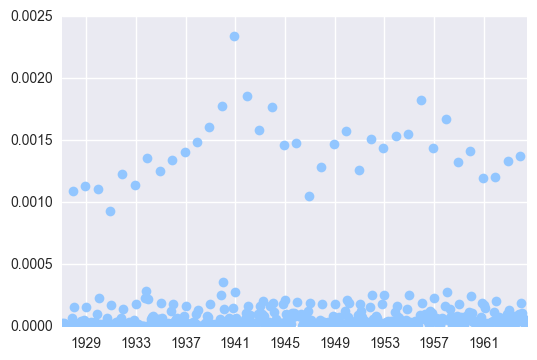

In [51]:
plt.plot_date(yearIndex[1500:1950],noel)

/Users/thomas/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


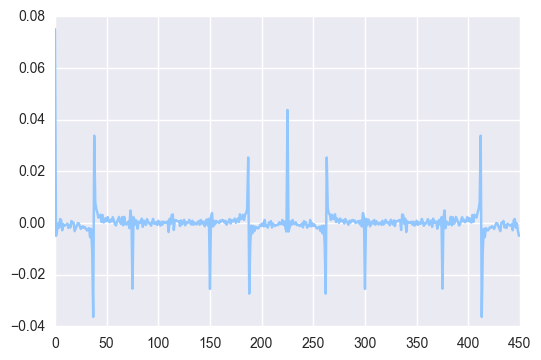

In [52]:
plt.plot(sc.fft(noel))

In [93]:
wordInterpolate = wordNorm.interpolate(method='time',axis=0,limit=8)

In [62]:
wordRolling = wordNorm.rolling(window=3).mean()

In [54]:
fftData = wordNorm.apply(sc.fft,axis=0)

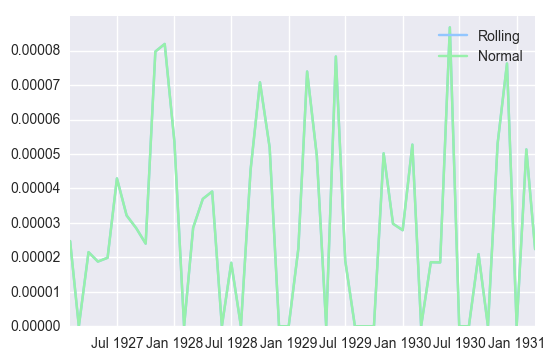

In [94]:
plt.plot_date(yearIndex[1500:1550],wordInterpolate['évoquer'].values[1500:1550],'-',label='Rolling')
plt.plot_date(yearIndex[1500:1550],wordInterpolate['évoquer'].values[1500:1550],'-',label='Normal')
plt.legend()

In [75]:
periodicWords = (fftData[fftData > 0.1 + 0.1j].sum(axis=0).values >0.1)

In [77]:
wordNorm.columns[periodicWords]

Index(['abandonner', 'abbé', 'abonn', 'abonnements', 'abord', 'aboutir',
       'abri', 'absence', 'absolue', 'absolument',
       ...
       'évolution', 'évoquer', 'évén', 'événemen', 'événements', 'évêque',
       'être', 'île', 'œil', 'œuvre'],
      dtype='object', length=3598)

In [90]:
wordInterpolate.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarg,aarhus,...,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre,——,———,„„„
1798-02-01,0.0,0.0,0.000000,0.0,0.000076,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-03-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-04-01,0.0,0.0,0.000159,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-05-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-06-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
